In [24]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [28]:
import matplotlib.pyplot as plt
import numpy as np

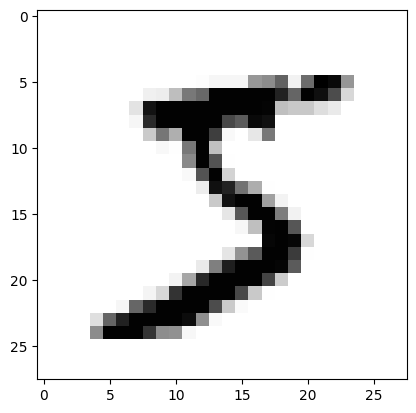

In [13]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [14]:
for x in X_train[0]:
    for i in x:
        print(f'{i:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [15]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64')/255

In [16]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [17]:
y_train[0]

5

In [20]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
model = Sequential()
model.add(Dense(521, input_dim = 28*28, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
model_path = './data/model/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor= 'val_loss',
                               verbose = 1, save_best_only = True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [26]:
hist = model.fit(X_train, y_train, validation_split=0.25, epochs= 2000, batch_size= 200,
                 verbose = 0, callbacks = [early_stopping, checkpointer])



Epoch 1: val_loss improved from inf to 0.18288, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18288 to 0.13159, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13159 to 0.11166, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11166 to 0.10790, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10790 to 0.09356, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09356 to 0.09138, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09138 to 0.08735, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08735 to 0.08292, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08292

Epoch 10: val_loss improved from 0.08292 to 0.07946, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.07946

Epoch 12: val_loss did not impro

In [27]:
print("Test accuracy : ", model.evaluate(X_test, y_test)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9820
Test accuracy :  0.9819999933242798


In [29]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']
x_len = np.arange(len(y_loss))

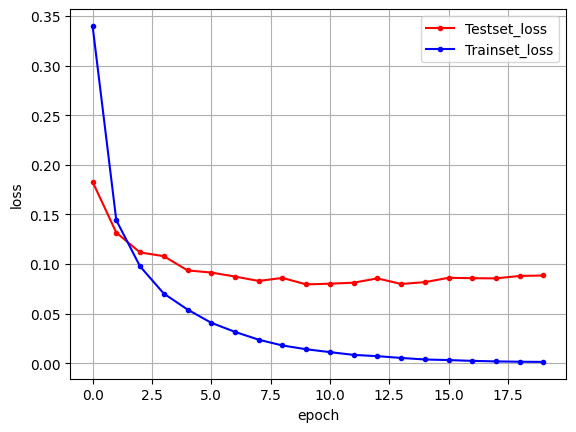

In [30]:
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()